# Ejercicios teóricos
---------------------------
Mátematicas para el aprendizaje de máquina

Paulina Castillo

30 de mayo de 2023

--------------------------


#### 1.2 ) Supongamos que utilizamos un perceptrón para detectar mensajes de spam. Digamos que cada mensaje de correo electrónico está representado por la frecuencia de aparición de palabras clave, y la salida es +1 si se considera que el mensaje es spam.


 a) ¿Puedes pensar en algunas palabras clave que terminarán con un peso positivo alto en el perceptrón?

* 'Principe nigeriano' / 'principe de Nigeria'
* 'Clickee aquí' 
* 'Urgente'
*  'Targeta de credito'
* 'Cuenta suspendida'
* 'Ganador'
* 'Coljugos'

##### b) ¿Qué hay de las palabras clave que obtendrán un peso negativo?

* 'Trabajo'
* 'Educación' 
* 'Invitación'
* 'Familia'

##### c)  ¿Qué parámetro en el perceptrón afecta directamente a cuántos mensajes ambiguos terminan siendo clasificados como spam?

El parámetro en el perceptrón que afecta directamente a cuántos mensajes ambiguos terminan siendo clasificados como spam es el umbral de decisión. El umbral determina el punto en el que se toma la decisión de clasificar un mensaje como spam o no spam. Si el umbral es bajo, es más probable que se clasifiquen más mensajes como spam, incluyendo aquellos que podrían considerarse "borderline" o ambiguos. 

#### 1.3) La regla de actualización de peso en (1.3) tiene la agradable interpretación de que se mueve en dirección de clasificar correctamente x(t)

##### a) Pruebe que $y(t)w^T(t)x(t) <0$

Como $x(t)$ está mal clasificado por $w(t)$ podemos asegurar que $y(t) = -sing(w^T(t)x(t))$, lo que implica $y(t)(w^T(t)x(t)) = -sing(w^T(t)x(t))(w^T(t)x(t))$

##### b) Pruebe que $y(t) \mathbf{w}^{\mathrm{T}}(t+1) \mathbf{x}(t)>y(t) \mathbf{w}^{\mathrm{T}}(t) \mathbf{x}(t)$

Se tiene, por el  (1.3)
$$
\mathbf{w}(t+1)=\mathbf{w}(t)+y(t) \mathbf{x}(t) .
$$
Lo cual implica
$$
\begin{aligned}
y(t) \mathbf{w}^{\mathrm{T}}(t+1) \mathbf{x}(t) & =y(t)(\mathbf{w}(t)+y(t) \mathbf{x}(t))^{\mathrm{T}} \mathbf{x}(t) \\
& =y(t)\left(\mathbf{w}^{\mathrm{T}}(t)+y(t) \mathbf{x}^{\mathrm{T}}(t)\right) \mathbf{x}(t) \\
& =y(t) \mathbf{w}^{\mathrm{T}}(t) \mathbf{x}(t)+(y(t))^2 \mathbf{x}^{\mathrm{T}}(t) \mathbf{x}(t) \\
& =y(t) \mathbf{w}^{\mathrm{T}}(t) \mathbf{x}(t)+(y(t))^2 \sum_{i=1}^d \mathbf{x}(t)_i^2 \\
& >y(t) \mathbf{w}^{\mathrm{T}}(t) \mathbf{x}(t)
\end{aligned}
$$


##### c)  En lo que respecta a clasificar x(t) , argumenta que el cambio de w(t)  a w(t +1)  es un movimiento "en la dirección correcta".

 Se vio que $y(t)w^T(t)x(t)$ incrementa por cada interación. Existen dos casos:
   * que $y(t)$ sea positivo y  $w^T(t)x(t)$ negativo, 
nos movemos $w^T(t)x(t)$ hacia valores positivos al incrementarlo.
   * que $y(t)$ es negativo,  $w^T(t)x(t)$ positivo. Si $y(t)w^T(t)x(t)$ aumenta significa que $w^T(t)x(t)$ decrece.
    Por tanto siempre se mueve hacía la región de $y(t)$ en cada iteración

#### 1.10 ) Aquí hay un experimento que ilustra la diferencia entre un solo compartimento y múltiples compartimentos. Ejecuta una simulación computacional de lanzamiento de 1,000 monedas justas. Lanza cada moneda de forma independiente 10 veces. Centrémonos en 3 monedas de la siguiente manera: $C_1$ es la primera moneda lanzada; $C_{rand}$ es una moneda que eliges al azar; $C_{min}$ es la moneda que tuvo la frecuencia mínima de caras (elige la primera en caso de empate). Sean $v_1$, $v_{rand}$ y $v_{min}$ las fracciones de caras obtenidas para los respectivos lanzamientos.

Importamos las librerías necesarias

In [409]:
import numpy as np
import matplotlib.pyplot as plt

Definimos una función de lanzamiento donde dado un  número n de monedas retorna un vector tamaño n con componentes binarios aleatorios.

In [410]:
def lanzamiento(numero_monedas):
    # Vector tamaño n de 0's
    resultados = np.zeros(numero_monedas) 
    # Vector tamaño n aleatorio con valores entre 0 a 1 
    probs = np.random.uniform( size = numero_monedas)
    # Todo los valores mayores a 0.5 son cara ahora: 1 y los menores son sello: 0
    resultados[probs > 0.5] = 1
    return resultados

In [411]:
def frecuencia_monedas(numero_monedas, numero_lanzamientos):

    # Escogemos una moneda aleatoria 

    numero_caras = np.zeros(numero_monedas) 
    
    # Vamos sumando los 1 por cada tiro a cada moneda
    for tiro in range(numero_lanzamientos):
        numero_caras = numero_caras + lanzamiento( numero_monedas )
    
    # Hallamos las frecuencias de cada moneda según la suma
    frecuencia_caras = numero_caras / numero_lanzamientos
    
    return frecuencia_caras

In [412]:

numero_monedas = 1000
numero_lanzamientos = 50
frecuencia_caras = frecuencia_monedas(numero_monedas, numero_lanzamientos)


In [413]:
c_rand = np.random.choice(numero_monedas)
v_rand = frecuencia_caras[c_rand]

c_1 = 0
v_1 = frecuencia_caras[c_1]

c_min = np.argmin(frecuencia_caras)
v_min = frecuencia_caras[c_min]



a) Cúal es $\mu$ para las 3 monedas escogidas

Sería de 0.5 dado que son monedas justas

b) Repite este experimento un número considerado de veces para conseguir varias instancias y plotear  los histogramas de distribución de  $v_1$, $v_{rand}$ y $v_{min}$

In [414]:
datos_v_1 = [v_1]
datos_v_rand = [v_rand]
datos_v_min = [v_min]

In [415]:
repeticiones = 10**3

for vez in range(repeticiones):
    frecuencia_caras = frecuencia_monedas(numero_monedas, numero_lanzamientos)

    c_rand = np.random.choice(numero_monedas)
    v_rand = frecuencia_caras[c_rand]

    v_1 = frecuencia_caras[c_1]

    c_min = np.argmin(frecuencia_caras)
    v_min = frecuencia_caras[c_min]

    datos_v_1.append(v_1)
    datos_v_rand.append(v_rand)
    datos_v_min.append(v_min)

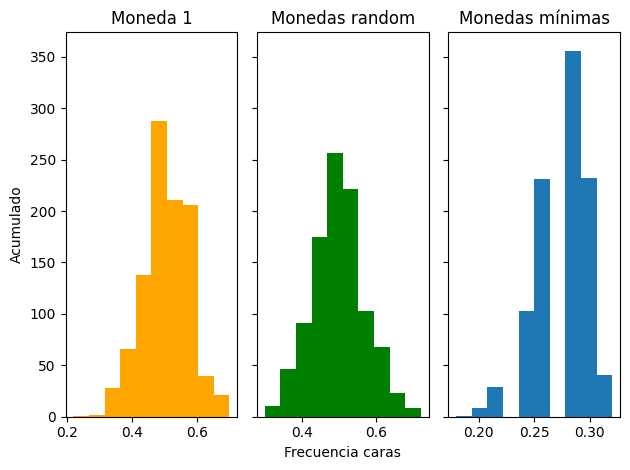

In [416]:
fig, axs = plt.subplots(1, 3, sharey=True, tight_layout=True)
n_bins = 10

axs[0].hist(datos_v_1, bins=n_bins, color='orange')
axs[0].set_title('Moneda 1')
axs[0].set_ylabel('Acumulado')

axs[1].hist(datos_v_rand, bins=n_bins,color='green')
axs[1].set_title('Monedas random')
axs[1].set_xlabel('Frecuencia caras')

axs[2].hist(datos_v_min, bins=n_bins)
axs[2].set_title('Monedas mínimas')


plt.show()

c) Usando el punto b), estima $P[|v-\mu|>\epsilon]$ como función de $\epsilon$, junto con la cota de he Hoeffdin $2e^{-2\epsilon^2N}$

In [426]:
def hoeffding_bound(epsilon, n):
    return 2.0*np.exp(-2.0*n*epsilon**2)

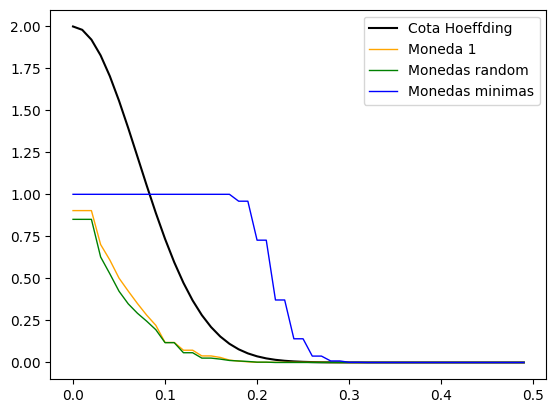

In [433]:

epsilon = np.arange(0.0,0.5,0.01)
cota = hoeffding_bound(epsilon, numero_lanzamientos)

datos_v_1 = np.array(datos_v_1)
datos_v_rand = np.array(datos_v_rand)
datos_v_min = np.array(datos_v_min)

datos_v_1_desplazados = np.abs(datos_v_1-0.5)
datos_v_rand_desplazados = np.abs(datos_v_rand-0.5)
datos_v_min_desplazados = np.abs(datos_v_min-0.5)


prob_1 = np.zeros(len(epsilon))
prob_rand = np.zeros(len(epsilon))
prob_min = np.zeros(len(epsilon))


# Cálculo para cada punto
for n in range(epsilon.shape[0]):

    ep = epsilon[n]
    prob_1[n] = np.sum(datos_v_1_desplazados > ep)/repeticiones
    prob_rand[n] = np.sum(datos_v_rand_desplazados > ep)/repeticiones
    prob_min[n] = np.sum(datos_v_min_desplazados > ep)/repeticiones



plt.plot(epsilon, cota, markerfacecolor='blue', markersize=8, color='black', label='Cota Hoeffding')
plt.plot(epsilon, prob_1, marker='', color='orange', linewidth=1, label='Moneda 1')
plt.plot(epsilon, prob_rand, marker='', color='green', linewidth=1, label='Monedas random')
plt.plot(epsilon, prob_min, marker='', color='blue', linewidth=1, label='Monedas minimas')
plt.legend()

d) Qué monedas obedecen a la cota de Hoeffdin. 


Las primeras dos monedas  cumplen con la desigualdad de Hoeffding, pero la moneda con la frecuencia mínima de caras no la cumple. Esto se debe a que, en los casos anteriores, las monedas ya estaban elegidas antes del experimento. La moneda de minimos no cuple ya que se debenhacer todos los lanzamientos y utilizar los datos para determinar cuál es la moneda con la frecuencia mínima de caras. 

#### 1.11) Se nos proporciona un conjunto de datos D con 25 ejemplos de entrenamiento de una función objetivo desconocida f: W × X → Y, donde X ⊆ R y Y ⊆ {1, -1}. Para aprender f, utilizamos un conjunto de hipótesis simple H = {h1, h2}, donde h1 es la función constante +1 y h2 es la función constante -1.

Consideramos dos algoritmos de aprendizaje, S (inteligente) y C (loco). S elige la hipótesis que coincide más con D, mientras que C elige deliberadamente la otra hipótesis. Veamos cómo se desempeñan estos algoritmos fuera de la muestra desde los puntos de vista determinístico y probabilístico. Supongamos, en la perspectiva probabilística, que hay una distribución de probabilidad en X, y sea P(f(x)) = p.

a) ¿Puede S producir una hipótesis que esté garantizada de tener un mejor desempeño que al azar en cualquier punto fuera de D?

No. S va a escoger una hipótesis que se aprenda los datos de D, siendo posible que no predizca de manera correcta datos nuevos

b) Supongamos, para el resto del ejercicio, que todos los ejemplos en D tienen $y_n$ = 1. ¿Es posible que la hipótesis que produce C resulte ser mejor que la hipótesis que produce S?

Sí, por la escogencia de S sobre los datos de D

c) Si p = 0.9, ¿cuál es la probabilidad de que S produzca una hipótesis mejor que C?

S siempre producirá una mejor hipotesis que C, ya que la probabilidad de la hipotesis de $S$ es 0.9, la de C será 0.1, y 0.9>0.1 

d) ¿Existe algún valor de p para el cual sea más probable que C produzca una hipótesis mejor que S?

será $1/2$ dada las definiciones de las probalidades de S y C. ya que se tiene que cumplir la condición que 
$$1 - p > p$$

#### 1.12. Un amigo se acerca a ti con un problema de aprendizaje. Dice que la función objetivo f es completamente desconocida, pero tiene 4,000 puntos de datos. Está dispuesto a pagarte para resolver su problema y producirle una g que aproxime a f. ¿Qué es lo mejor que puedes prometerle de entre las siguientes opciones?

(a) Después de aprender, le proporcionarás una g que garantizará una buena aproximación a f fuera de la muestra.

(b) Después de aprender, le proporcionarás una g y con alta probabilidad, la g que produzcas aproximará bien a f fuera de la muestra.

(c) Ocurrirá una de dos cosas.

        (i) Producirás una hipótesis g;
       (ii) Declararás que has fallado. Si devuelves una hipótesis g, entonces con alta probabilidad la g que produzcas aproximará bien a f fuera de la muestra.

La mejor opción entre las mencionadas es (c). No se puede garantizar (a), ya que la función objetivo puede ser complicada de tratar, y por la misma razón, no se puede prometer (b) con una alta probabilidad de que la hipótesis g se aproxime a f. Sin embargo, si realmente se puede aprender de los datos, según la desigualdad de Hoeffding, se puede asegurar que g se acerque a f debido a la gran cantidad de puntos de datos disponibles. En particular, la probabilidad de que la diferencia entre el error dentro de la muestra y el error fuera de la muestra sea mayor a un valor dado ε es muy baja. Con un ε de alrededor de 0.06, esta probabilidad es casi del 0%, lo que implica que el error dentro y fuera de la muestra estarán separados en un rango de aproximadamente 0.06 con una alta probabilidad.